<a href="https://colab.research.google.com/github/Rub-T/challenge-AluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



---
### Primero se importa la libreria de matplot para poder utilizar sus funciones y gráficas, ademas de estyablecer un mejor formato para la lectura de cantidades.


---



In [117]:
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.0f}'.format



---


### Aqui se realiza la suma de los ingresos de cada tienda y se crea un data frame para una mejor visualización de los resultados.

---



In [118]:
ingreso_tienda1=tienda['Precio'].sum()
ingreso_tienda2=tienda2['Precio'].sum()
ingreso_tienda3=tienda3['Precio'].sum()
ingreso_tienda4=tienda4['Precio'].sum()
ingresos_df=pd.DataFrame({"Tiendas":["Tienda 1","Tienda 2","Tienda 3","Tienda 4"],
                          "Total":[ingreso_tienda1,ingreso_tienda2,ingreso_tienda3,ingreso_tienda4]})
display(ingresos_df)

,Tiendas,Total
0,Tienda 1,"1,150,880,400"
1,Tienda 2,"1,116,343,500"
2,Tienda 3,"1,098,019,600"
3,Tienda 4,"1,038,375,700"


---


### Ahora con los datos obtenidos, creamos una gráfica para comparar y visualizar de mejor manera los ingresos en cada tienda.

---

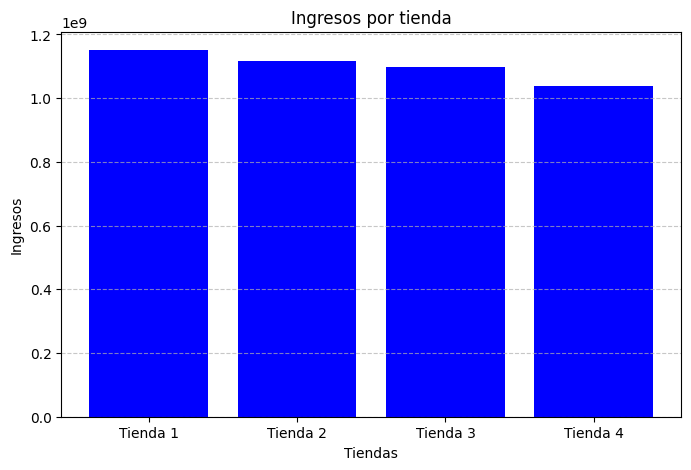

In [119]:
plt.figure(figsize=(8, 5))
plt.bar(ingresos_df["Tiendas"],ingresos_df["Total"],color="blue")
plt.title("Ingresos por tienda")
plt.xlabel("Tiendas")
plt.ylabel("Ingresos")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



---


### Podemos darnos cuenta de que la tienda 1 es la que tuvo un ingreso mayor, aunque la diferencia con las demás no es mucha.


---



# 2. Ventas por categoría

---

### Ahora calculamo la cantidad de ventas que hubo en cada categoria por ccada tienda, así podremos saber la cantidad de transacciones o ventas que tiene cada una.


---



In [116]:
lista_tiendas=[(1,tienda),(2,tienda2),(3,tienda3),(4,tienda4)]
for i in lista_tiendas:
  print(f"\nTienda {i[0]} - No. de ventas por categoría:\n")
  venta_por_categoria=i[1].groupby('Categoría del Producto')['Producto'].count().reset_index(name="Numero de ventas")
  print(venta_por_categoria)
  total_de_ventas=venta_por_categoria['Numero de ventas'].sum()
  print(f"\nTotal de ventas: {total_de_ventas}")



Tienda 1 - No. de ventas por categoría:

    Categoría del Producto  Numero de ventas
0  Artículos para el hogar               171
1     Deportes y diversión               284
2        Electrodomésticos               312
3             Electrónicos               448
4   Instrumentos musicales               182
5                 Juguetes               324
6                   Libros               173
7                  Muebles               465

Total de ventas: 2359

Tienda 2 - No. de ventas por categoría:

    Categoría del Producto  Numero de ventas
0  Artículos para el hogar               181
1     Deportes y diversión               275
2        Electrodomésticos               305
3             Electrónicos               422
4   Instrumentos musicales               224
5                 Juguetes               313
6                   Libros               197
7                  Muebles               442

Total de ventas: 2359

Tienda 3 - No. de ventas por categoría:

    Categoría del 



---


### Como podemos observar, cada tienda tiene una cantidad similar de ventas finales, la unica que se cada atrás sería la tienda 4.

---



# 3. Calificación promedio de la tienda


---
### En este apartado calculamos la calificación promedio que tiene cada tienda por parte de los usuarios para saber cual es la más popular en el mercado.

---

In [43]:
def calcular_calificacion(lista_tiendas):
  calificaciones_lista=[]
  for i in lista_tiendas:
    calif_por_tienda= i[1]['Calificación'].mean().round(2)
    nombre= f"Tienda {i[0]}"
    calificaciones_lista.append({'Tienda': nombre, 'Calificación Promedio': calif_por_tienda})
    print(f'La calificación promedio de la {nombre} es: {calif_por_tienda}')
  return calificaciones_lista
calificaciones_lista=calcular_calificacion(lista_tiendas)

La calificación promedio de la Tienda 1 es: 3.98
La calificación promedio de la Tienda 2 es: 4.04
La calificación promedio de la Tienda 3 es: 4.05
La calificación promedio de la Tienda 4 es: 4.0




---
Aqui se genera una grafica de puntos con una mejor visualización de la diferencia para poder darnos cuenta de cual es la más popular.


---




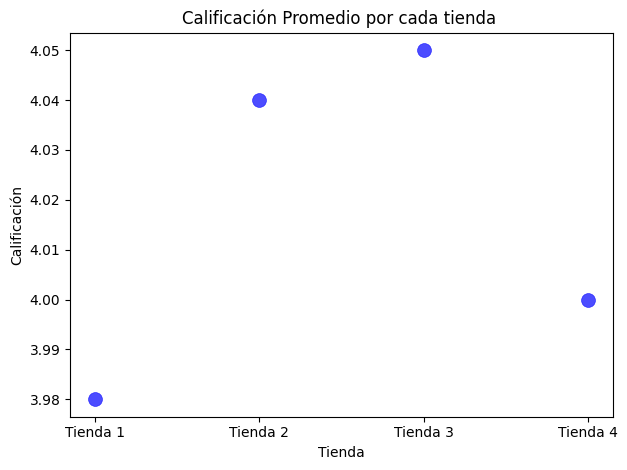

In [26]:
def grafica_calificaciones(lista_tiendas):
  tiendas_label = [d['Tienda'] for d in calificaciones_lista]
  calificaciones_label = [d['Calificación Promedio'] for d in calificaciones_lista]

  plt.scatter(tiendas_label, calificaciones_label, color='blue', s=100, alpha=0.7, linewidth=0.5)
  plt.title('Calificación Promedio por cada tienda ')
  plt.xlabel('Tienda')
  plt.ylabel('Calificación')
  plt.tight_layout()
  plt.show()

grafica_calificaciones(lista_tiendas)




---
### Como podemos oobservar en la gráfica, la diferencia que hay en las calificaciones de cada tienda es muy poca, siendo la tienda 1 la que tiene una calificación menor.


---



# 4. Productos más y menos vendidos

---
###En este apartado verificamos cuales son los productos más vendidos y menos vendidos en cada tienda para poder saber cuales son los productos más populares entre los consumidores y cuales son los que menos les interesa.


---





Estos son los 5 productos más vendidos de la Tienda 1:


,count
Producto,
Microondas,60
TV LED UHD 4K,60
Armario,60
Secadora de ropa,58
Mesa de noche,56



Estos son los 5 productos menos vendidos de la Tienda 1:


,count
Producto,
Ciencia de datos con Python,39
Pandereta,36
Olla de presión,35
Auriculares con micrófono,33
Celular ABXY,33


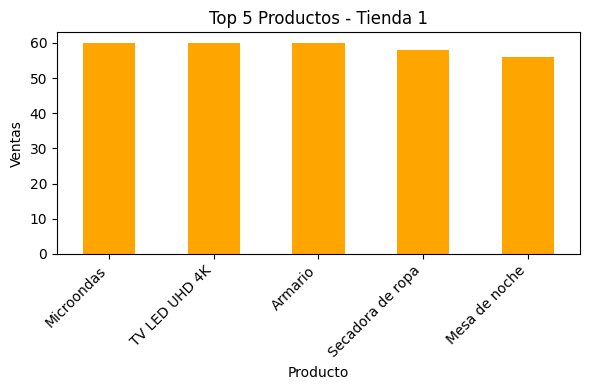


Estos son los 5 productos más vendidos de la Tienda 2:


,count
Producto,
Iniciando en programación,65
Microondas,62
Batería,61
Guitarra acústica,58
Pandereta,58



Estos son los 5 productos menos vendidos de la Tienda 2:


,count
Producto,
Auriculares,37
Sillón,35
Mesa de comedor,34
Impresora,34
Juego de mesa,32


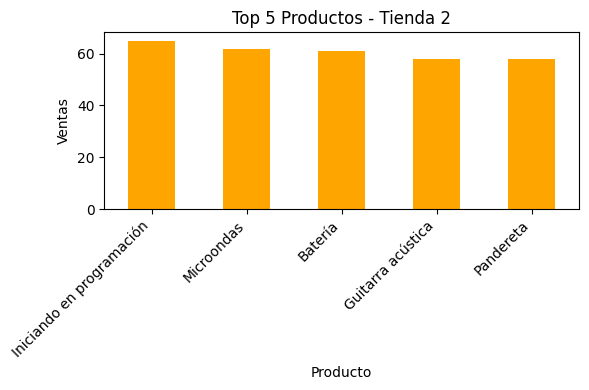


Estos son los 5 productos más vendidos de la Tienda 3:


,count
Producto,
Kit de bancas,57
Mesa de comedor,56
Cama king,56
Set de ollas,55
Mesa de noche,55



Estos son los 5 productos menos vendidos de la Tienda 3:


,count
Producto,
Guitarra eléctrica,38
Set de vasos,36
Mochila,36
Microondas,36
Bloques de construcción,35


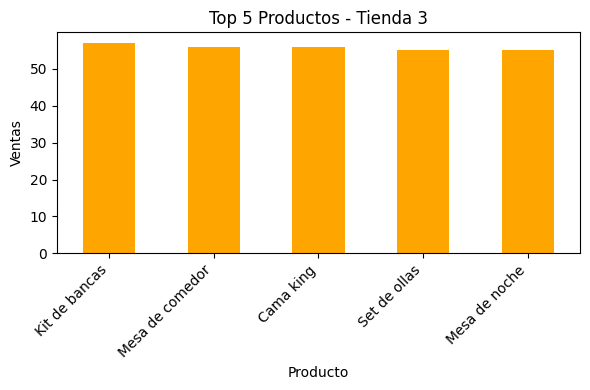


Estos son los 5 productos más vendidos de la Tienda 4:


,count
Producto,
Cama box,62
Cubertería,59
Dashboards con Power BI,56
Cama king,56
Carrito de control remoto,55



Estos son los 5 productos menos vendidos de la Tienda 4:


,count
Producto,
Refrigerador,38
Ciencia de datos con Python,38
Guitarra acústica,37
Armario,34
Guitarra eléctrica,33


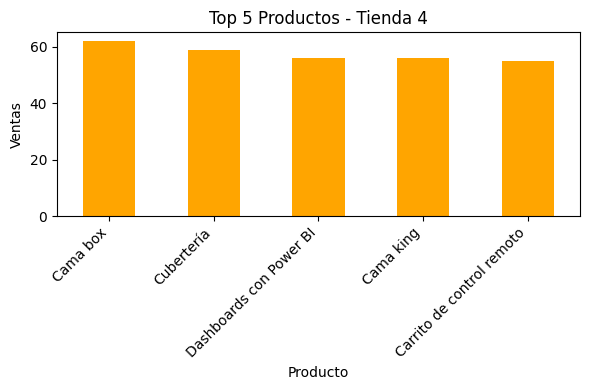

In [126]:
tiendas={"Tienda 1":tienda,"Tienda 2":tienda2,"Tienda 3":tienda3,"Tienda 4":tienda4}
mas_vendidos={}
menos_vendidos={}

for i, (nombre, df) in enumerate(tiendas.items()):
    mas_vendidos[nombre] = df['Producto'].value_counts().head(5)
    menos_vendidos[nombre] = df['Producto'].value_counts().tail(5)

    print(f"\nEstos son los 5 productos más vendidos de la {nombre}:")
    display(mas_vendidos[nombre])
    print(f"\nEstos son los 5 productos menos vendidos de la {nombre}:")
    display(menos_vendidos[nombre])

    plt.figure(figsize=(6,4))

    mas_vendidos[nombre].plot(kind='bar', color=['orange'])

    plt.title(f'Top 5 Productos - {nombre}')
    plt.xlabel('Producto')
    plt.ylabel('Ventas')

    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()

    plt.show()

# 5. Envío promedio por tienda



---
###Aqui lo que hacemos es determinar el costo promedio que tiene cada tienda por envio, de esta manera podremos determinar cual es la tienda que gasta más en los envios.
---



In [96]:
def calcular_costo_envio(lista_tiendas):
  costos_lista=[]
  for i in (lista_tiendas):
    costo_envio=i[1]["Costo de envío"].mean().round(2)
    tienda=f"Tienda {i[0]}"
    costos_lista.append({'Tienda':tienda,'Costo promedio':costo_envio})
    costos_df=pd.DataFrame(costos_lista)
  display(costos_df)
  return costos_lista


costos_lista=calcular_costo_envio(lista_tiendas)

,Tienda,Costo promedio
0,Tienda 1,"26,019"
1,Tienda 2,"25,216"
2,Tienda 3,"24,806"
3,Tienda 4,"23,459"


---
###A continuación crearemos una grafica de pastel donde podremos ver de manera más clara que porcentaje abarca cada tienda en el costo promedio total de envios que hay por las 4 tiendas.
---

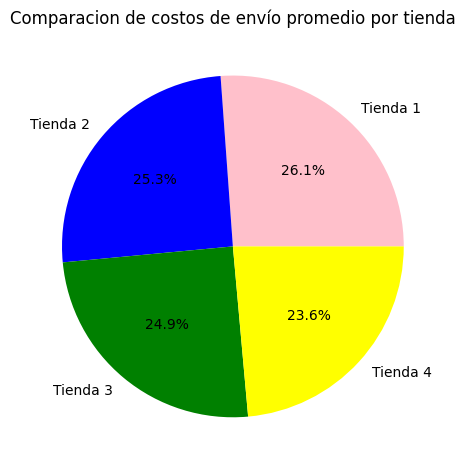

In [111]:
def graficar_torta_envio(costos_lista):
    tiendas_nombres = [i['Tienda'] for i in costos_lista]
    costos_promedio = [i['Costo promedio'] for i in costos_lista]

    plt.pie(costos_promedio, labels=tiendas_nombres, autopct='%1.1f%%', colors=['pink', 'blue', 'green', 'yellow'])
    plt.title('Comparacion de costos de envío promedio por tienda')
    plt.tight_layout()
    plt.show()

graficar_torta_envio(costos_lista)

---
###Como podemos observar, la tienda 1 es la que tiene un mayor porcentaje de costo promedio de envios de las 4 tiendas, sin embargo esto también puede deberse a que es la tienda 1 la que tiene una mayor cantidad de ventas de las 4 tiendas, aunque la diferencia con las demás tiendas sigue siendo muy poca.
---


# CONCLUSIÓN FINAL

### Como se puede observar a lo largo del analisis, las variación de numero de ventas, ingresos, ventas de productos y costos de envio que hay entre todas las tiendas es muy poca, siendo que cada tienda podría considerarse casi igual de fructifera, por lo que la recomendación incial sería: **No vender ninguna tienda**.
### Sin embargo, de tomarse la decisión de vender alguna, la tienda que se encuentra siendo la más baja de los parametros analizados, seria la tienda 4, por lo que, **la tienda 4 deberá ser considerada la mejor opción para ser vendida.**